# Example of confidence interval computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import zfit
from zfit.loss import UnbinnedNLL
from zfit.minimize import Minuit

from hepstats.hypotests.calculators import FrequentistCalculator, AsymptoticCalculator
from hepstats.hypotests import ConfidenceInterval
from hepstats.hypotests.parameters import POIarray, POI

from utils import one_minus_cl_plot, pltdist, plotfitresult

/Users/matthieumarinangeli/anaconda3/envs/tfn2/lib/python3.7/site-packages/zfit-0.0.0-py3.7.egg/zfit/util/execution.py:70: UserWarning: Not running on Linux. Determining available cpus for thread can failand be overestimated. Workaround (only if too many cpus are used):`zfit.run.set_n_cpu(your_cpu_number)`
  warnings.warn("Not running on Linux. Determining available cpus for thread can fail"


In [2]:
zfit.settings.set_seed(15)

### Fit of a Gaussian signal over an exponential background:

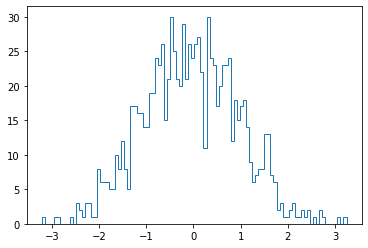

In [3]:
bounds = (-10, 10)

obs = zfit.Space('x', limits=bounds)

mean = zfit.Parameter("mean", -0.05, -5, 5)
sigma = zfit.Parameter("sigma", 1.0)
model = zfit.pdf.Gauss(obs=obs, mu=mean, sigma=sigma)

data = model.sample(1000)
plt.hist(data.numpy(), bins=100, histtype='step');

In [4]:
# Create the negative log likelihood
nll = UnbinnedNLL(model=model, data=data) 

In [5]:
# Instantiate a minuit minimizer
minimizer = Minuit()

In [6]:
# minimisation of the loss function
minimum = minimizer.minimize(loss=nll)
minimum.hesse();
print(minimum)

------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=27 (27 total)      |
| EDM = 4.26E-08 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
FitResult of
<UnbinnedNLL model=[<zfit.Gauss  params=[mean, sigma] dtype=float64>0] data=[<zfit.core.data.SampleData object at 0x7fd8d8ff9a90>] constraints=[]> 
with
<Minuit strategy=PushbackStrat

Text(0, 0.5, 'number of events')

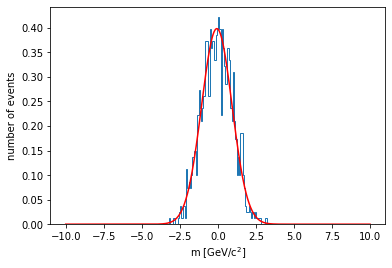

In [7]:
nbins = 80
plt.hist(data.numpy(), bins=nbins, histtype='step', density=True);
plotfitresult(model, bounds, nbins)
plt.xlabel("m [GeV/c$^2$]")
plt.ylabel("number of events")

### Confidence interval

We want to compute the confidence interval of the mean of the Gaussian at 68% confidence level.

In [8]:
# Create the negative log likelihood

# instantation of the calculator
#calculator = FrequentistCalculator(nll, minimizer, ntoysnull=100)
calculator = AsymptoticCalculator(nll, minimizer)
calculator.bestfit = minimum #optionnal

In [9]:
# parameter of interest of the null hypothesis
poinull = POIarray(mean, np.linspace(-0.5, 0.5, 50))

In [10]:
from scipy.stats import norm

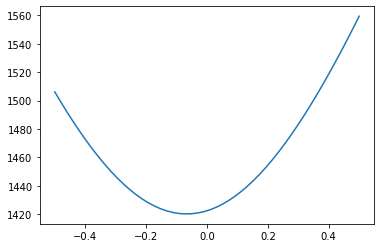

In [11]:
plt.plot(poinull.values, calculator.obs_nll(poinull))

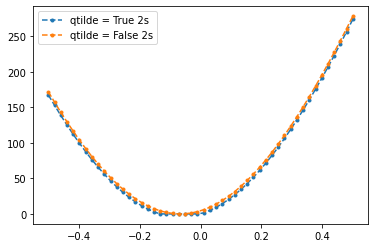

In [12]:
#plt.plot(poinull.values, calculator.qobs(poinull, onesided=True, qtilde=True), ".--", label="qtilde = True 1s")
#plt.plot(poinull.values, calculator.qobs(poinull, onesided=True, qtilde=False), ".--", label="qtilde = False 1s")
plt.plot(poinull.values, calculator.qobs(poinull, onesided=False, qtilde=True), ".--", label="qtilde = True 2s")
plt.plot(poinull.values, calculator.qobs(poinull, onesided=False, qtilde=False), ".--", label="qtilde = False 2s")
plt.legend()

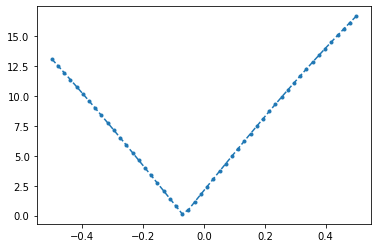

In [13]:
plt.plot(poinull.values, calculator.qobs(poinull, onesided=False)**0.5, ".--")

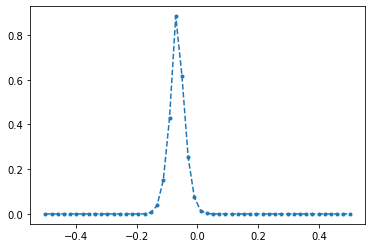

In [14]:
plt.plot(poinull.values, calculator.pvalue(poinull, onesided=False)[0], ".--")

In [15]:
# instantation of the discovery test
ci = ConfidenceInterval(calculator, poinull, qtilde=True)

In [16]:
ci.interval();


Get fitted values of the nuisance parameters for the alternative hypothesis!
------------------------------------------------------------------
| FCN = 1420                    |      Ncalls=18 (18 total)      |
| EDM = 1.46E-09 (Goal: 5E-05)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
FitResult of
<UnbinnedNLL model=[<zfit.Gauss  params=[mean, sigma] dtype=float64>0] data=[<zfit.core.data.SampleData o

/Users/matthieumarinangeli/hepstats/src/hepstats/hypotests/calculators/asymptotic_calculator.py:32: UserWarning: The function <function Space.limit1d at 0x7fd8d7da0950> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=(0,), limits=(array([[-10.]]), array([[10.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  bounds = space.limit1d
/Users/matthieumarinangeli/hepstats/src/hepstats/hypotests/calculators/asymptotic_calculator.py:37: UserWarning: The function <function Space.area at 0x7fd8d7da0710> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=(0,), limits=(array([[-10.]]), array([[10.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  hist *= space.area() / nbins
/


Confidence interval on mean:
	0.0 < mean < 0.007469283201048501 at 68.0% C.L.


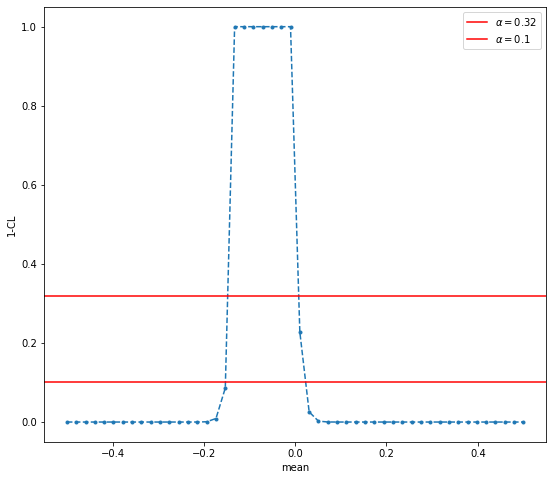

In [17]:
f = plt.figure(figsize=(9, 8))
one_minus_cl_plot(poinull.values, ci.pvalues(), alpha=[0.32, 0.1])
plt.xlabel("mean")
plt.legend()

In [18]:
minimum.errors()

/Users/matthieumarinangeli/anaconda3/envs/tfn2/lib/python3.7/site-packages/zfit-0.0.0-py3.7.egg/zfit/minimizers/fitresult.py:314: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  "in the future, add it explicitly as in `errors(method='minuit_minos')`", FutureWarning)


(OrderedDict([(<zfit.Parameter 'mean' floating=True value=-0.06682>,
               -------------------------------------------------
|      mean       |            Valid            |
-------------------------------------------------
|      Error      |    -0.03     |     0.03     |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False     |    False     |
-------------------------------------------------),
              (<zfit.Parameter 'sigma' floating=True value=1.151>,
               -------------------------------------------------
|      sigma      |            Valid            |
-------------------------------------------------
|      Error      |    -0.022    |     0.023    |
|      Valid      |     True     |     True     |
|    At Limit     |    False     |    False     |
|     Max FCN     |    False     |    False     |
|     New Min     |    False    

In [19]:
poialt = POI(mean, minimum.params[mean]["value"])

In [20]:
poialt

POI('mean', value=-0.0668235621376887)

/Users/matthieumarinangeli/hepstats/src/hepstats/hypotests/calculators/asymptotic_calculator.py:348: RuntimeWarning: invalid value encountered in true_divide
  palt_2 = 1.0 - norm.cdf((qobs - qalt) / (2.0 * sqrtqalt))
/Users/matthieumarinangeli/anaconda3/envs/tfn2/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/Users/matthieumarinangeli/anaconda3/envs/tfn2/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/Users/matthieumarinangeli/anaconda3/envs/tfn2/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1827: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= np.asarray(_b)) & cond0
/Users/matthieumarinangeli/hepstats/src/hepstats/hypotests/calculators/asymptotic_calculator.py:265: RuntimeWarning: invalid value encountered in true_divide
  pnull_2 = 1.0 

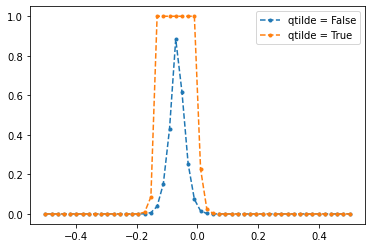

In [28]:
#plt.plot(poinull.values, calculator.pvalue(poinull, onesided=False, qtilde=False)[0], ".--", label="qtilde = False")
#plt.plot(poinull.values, calculator.pvalue(poinull, onesided=False, qtilde=True)[0], ".--", label="qtilde = True")
plt.plot(poinull.values, calculator.pvalue(poinull=poinull, poialt=poialt, onesided=False, qtilde=False)[0], ".--", label="qtilde = False")
plt.plot(poinull.values, calculator.pvalue(poinull=poinull, poialt=poialt, onesided=False, qtilde=True)[0], ".--", label="qtilde = True")
plt.legend()

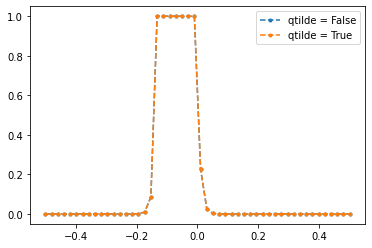

In [22]:
qobs = calculator.qobs(poinull, qtilde=True, onesided=False)
qalt = calculator.qalt(poinull, poialt, onesided=False, onesideddiscovery=False)

plt.plot(poinull.values, calculator.pnull(qobs, qalt, onesided=False, qtilde=False), ".--", label="qtilde = False")
plt.plot(poinull.values, calculator.pnull(qobs, qalt, onesided=False, qtilde=True), ".--", label="qtilde = True")
plt.legend()

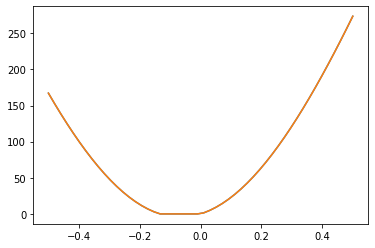

In [23]:
plt.plot(poinull.values, qobs)
plt.plot(poinull.values, qobs)

In [24]:
qobs > qalt

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

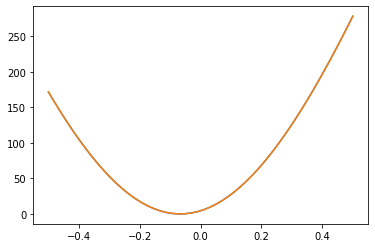

In [25]:
plt.plot(poinull.values, qalt)
plt.plot(poinull.values, qalt)

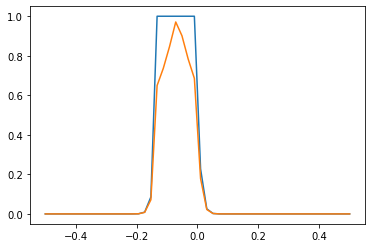

In [26]:
sqrtqobs = np.sqrt(qobs)
pnull_1 = (1.0 - norm.cdf(sqrtqobs)) * 2.0

sqrtqalt = np.sqrt(qalt)
pnull_2 = 1.0 - norm.cdf((qobs + qalt) / (2.0 * sqrtqalt))
pnull_2 += 1.0 - norm.cdf(sqrtqobs)

plt.plot(poinull.values, pnull_1)
plt.plot(poinull.values, pnull_2)

In [27]:
nll = calculator.obs_nll(poinull)